In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("cdata.csv")
mydata = data.iloc[:,:2]
mydata["label"] = [-1]*len(mydata)
#print(mydata)

In [9]:
def dist(x1,y1,x2,y2):
    distance = ((x1-x2)**2 + (y1-y2)**2)**0.5
    return distance

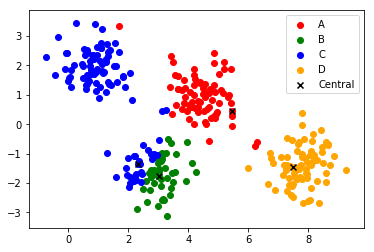

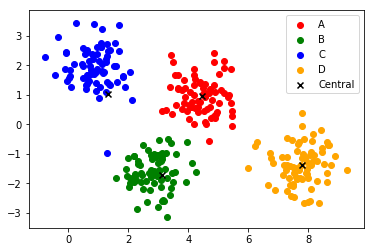

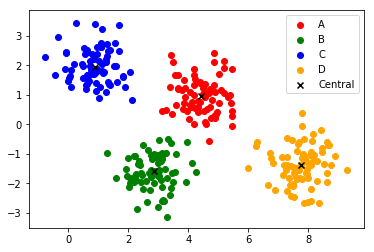

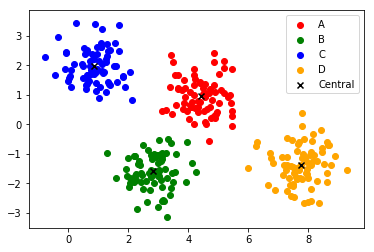

In [10]:
#(1)
k=4
plotlabel = ["A","B","C","D"]
color = ["red","green","blue","orange"]
#centroidindex = list(np.random.randint(0,len(mydata),k)) 絕對不可用這個，ranint會產生重複的數，程式會出錯
centroidindex = list(np.random.choice(len(data),k,replace=False))
centroiddata = mydata.loc[centroidindex]
iteration = 0
new_centroiddata = centroiddata.copy() #不可用new_centroiddata = centroiddata，不然之後new_centroiddata改了，centroiddata會跟著改
while True:
    mycluster = {}
    for i in range(len(mydata)):
        x1 = mydata.loc[i,"x"]
        y1 = mydata.loc[i,"y"]
        min_d = 10000        
        group = -1
        for j in range(k):
            x2 = centroiddata.loc[centroidindex[j],"x"]
            y2 = centroiddata.loc[centroidindex[j],"y"]
            d = dist(x1,y1,x2,y2)
            if((d) < (min_d)):
                min_d = d
                group = j
        mycluster[i] = group
    groupdata = {}
    for g in range(k):
        groupindex = []
        for h in mycluster:
            if mycluster[h]==g:
                groupindex.append(h)
        groupdata[g] = groupindex
        mydata.loc[groupindex,"label"] = g
        plt.scatter(mydata.loc[groupindex,"x"],mydata.loc[groupindex,"y"],c=color[g],label=plotlabel[g])
    plt.scatter(centroiddata["x"],centroiddata["y"],marker="x",c="black",label="Central")
    plt.legend()    
    plt.show()
    for z in range(k):
        new_centroiddata.loc[centroidindex[z],"x"] = np.average(mydata.loc[groupdata[z],"x"])
        new_centroiddata.loc[centroidindex[z],"y"] = np.average(mydata.loc[groupdata[z],"y"])
    if new_centroiddata.equals(centroiddata):
        break
    else:
        centroiddata = new_centroiddata.copy() 
        #不可用centroiddata = new_centroiddata，不然之後centroiddata改了，new_centroiddata會跟著改
        iteration += 1

In [11]:
def SSEofkmeans(mydata,k):
    #centroidindex = list(np.random.randint(0,len(mydata),k)) 絕對不可用這個，ranint會產生重複的數程式會出錯
    centroidindex = list(np.random.choice(len(data),k,replace=False))
    centroiddata = mydata.loc[centroidindex]
    iteration = 0
    new_centroiddata = centroiddata.copy()
    #不可用new_centroiddata = centroiddata，不然之後new_centroiddata改了，centroiddata會跟著改
    while True:
        mycluster = {}
        for i in range(len(mydata)):
            x1 = mydata.loc[i,"x"]
            y1 = mydata.loc[i,"y"]
            min_d = 10000
            group = -1
            for j in range(k):
                x2 = centroiddata.loc[centroidindex[j],"x"]
                y2 = centroiddata.loc[centroidindex[j],"y"]
                d = dist(x1,y1,x2,y2)
                if((d) < (min_d)):
                    min_d = d
                    group = j
            mycluster[i] = group
        groupdata = {}
        for g in range(k):
            groupindex = []
            for h in mycluster:
                if mycluster[h]==g:
                    groupindex.append(h)
            groupdata[g] = groupindex
            mydata.loc[groupindex,"label"] = g
        for z in range(k):
            new_centroiddata.loc[centroidindex[z],"x"] = np.average(mydata.loc[groupdata[z],"x"])
            new_centroiddata.loc[centroidindex[z],"y"] = np.average(mydata.loc[groupdata[z],"y"])
        if new_centroiddata.equals(centroiddata):
            break
        else:
            centroiddata = new_centroiddata.copy()
            #不可用centroiddata = new_centroiddata，不然之後centroiddata改了，new_centroiddata會跟著改
            iteration += 1
    sse = []
    for m in range(k):
        subsse = 0
        x1 = centroiddata.loc[centroidindex[m],"x"]
        y1 = centroiddata.loc[centroidindex[m],"y"]
        for n in range(len(mydata)):
            if (mydata.loc[n,"label"]==m):
                x2 = mydata.loc[n,"x"]
                y2 = mydata.loc[n,"y"]
                subsse = subsse + dist(x1,y1,x2,y2)
        sse.append(subsse)
    return sum(sse)

In [12]:
diffksse = []
for p in range(2,51):
    diffksse.append(SSEofkmeans(mydata,p))

Text(0,0.5,'Sum of square error')

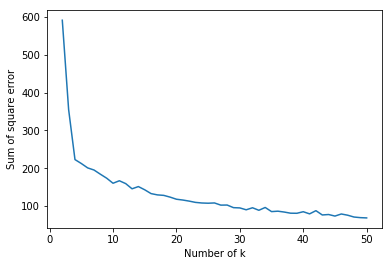

In [13]:
#(2)
plt.plot(list(range(2,51)),diffksse)
plt.xlabel("Number of k")
plt.ylabel("Sum of square error")

In [14]:
sses=[]
for q in range(10):
    sses.append(SSEofkmeans(mydata,10))

Text(0,0.5,'Sum of square error')

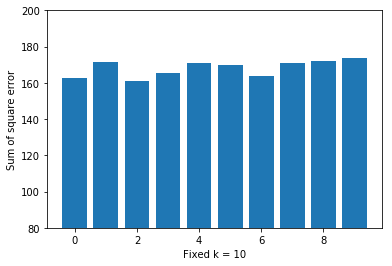

In [15]:
#(3)
plt.bar(list(range(10)),sses)
plt.ylim(80,200)
plt.xlabel("Fixed k = 10")
plt.ylabel("Sum of square error")